# `is_subtree` en un BST

El método `is_subtree` verifica si un árbol binario de búsqueda (BST) es subárbol de otro. Un BST T2 se considera subárbol de otro BST T1 si existe un nodo n en T1 tal que el subárbol de T1 enraizado en n es idéntico a T2. Esta operación es útil en diversas aplicaciones, como el análisis de estructuras de datos, optimización de consultas en bases de datos y en la implementación de algoritmos de comparación de árboles.

<pre>
        T1:               T2:

         5                 3
        / \               / \
       3   7             2   4
      / \
     2   4
 </pre>

 T2 es un subárbol de T1, ya que podemos encontrar a T2 completo dentro de T1   

## Implementación en Python

Para implementar `is_subtree`, necesitamos dos funciones auxiliares: una para verificar si dos árboles son idénticos y otra para buscar en el árbol principal (T1) el posible punto de inicio de la comparación (el nodo que tiene el mismo valor que la raíz de T2).

Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py): 

In [13]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BST.py
from src.BST import BST

In [14]:
def are_identical(self, root1, root2):
    # Comprueba si dos árboles binarios son idénticos
    if not root1 and not root2:
        return True
    if root1 and root2 and root1.data == root2.data:
        return (self.are_identical(root1.left, root2.left) and
                self.are_identical(root1.right, root2.right))
    return False

def is_subtree(self, T1, T2):
    # Verifica si T2 es un subárbol de T1
    if not T2:
        return True  # Un árbol vacío es subárbol de cualquier árbol
    if not T1:
        return False  # T2 no vacío no puede ser subárbol de un árbol vacío

    # Si el nodo actual tiene el mismo valor que la raíz de T2, verifica si son idénticos
    if T1.data == T2.data:
        if self.are_identical(T1, T2):
            return True

    # Continúa la búsqueda en los hijos
    return self.is_subtree(T1.left, T2) or self.is_subtree(T1.right, T2)

# Extender BinaryTree para incluir is_subtree
BST.is_subtree = is_subtree
BST.are_identical = are_identical

## Pruebas `is_subtree`

Vamos a demostrar la funcionalidad de `is_subtree` creando dos BST y verificando si uno es subárbol del otro.

T1:


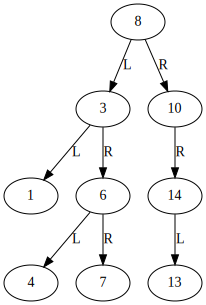

T2:


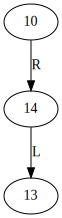

T2 es subárbol de T1: True


In [15]:

# Crear BST principal T1 y un posible subárbol T2
t1 = BST()
for key in [8, 3, 10, 1, 6, 14, 4, 7, 13]:
    t1.insert(key)

# Visualizar el árbol
dot = visualize_bt(t1)
print("T1:")
display(dot)

t2 = BST()
for key in [10, 14, 13]:
    t2.insert(key)

# Visualizar el árbol
dot = visualize_bt(t2)
print("T2:")
display(dot)

# Probar is_subtree
print("T2 es subárbol de T1:", t1.is_subtree(t1.root, t2.root))

## Complejidad del Algoritmo

La complejidad temporal de `is_subtree` es O(n * m), donde n es el número de nodos en T1 y m el número de nodos en T2, porque en el peor caso se debe verificar la igualdad de árboles en cada nodo de T1.

La complejidad espacial es O(h1 + h2), donde h1 y h2 son las alturas de T1 y T2 respectivamente, debido a la profundidad de la pila de llamadas recursivas para ambos árboles durante la comparación.

## Ejercicios Prácticos

1. Implementa la función `is_subtree` para árboles binarios no necesariamente de búsqueda, considerando las mismas definiciones de subárbol.
2. Mejora la eficiencia de `is_subtree` usando técnicas de preprocesamiento, como la serialización de árboles y la búsqueda de subcadenas, para evitar la comparación exhaustiva de nodos.

## Soluciones a los Ejercicios

1. Para árboles binarios no de búsqueda, se puede usar el mismo enfoque, pero sin asumir un orden específico, lo que significa que deberías verificar cada posible correspondencia de la raíz de T2 en T1 y luego comparar la estructura y valores del subárbol de manera recursiva.

2. Para mejorar la eficiencia, podrías serializar ambos árboles (por ejemplo, en preorden, marcando explícitamente las posiciones nulas) y luego utilizar un algoritmo eficiente de búsqueda de subcadenas (como KMP, Rabin-Karp, etc.) para verificar si la serialización de T2 es una subcadena de la serialización de T1.